In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/dataset_preprocessed.csv', encoding='utf-8', header=0, low_memory=False)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406431 entries, 0 to 406430
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   COMISARIA                 406431 non-null  object
 1   DERIVADA_FISCALIA         406431 non-null  object
 2   DIRECCION                 406431 non-null  object
 3   DIST_CIA                  406431 non-null  object
 4   DIST_HECHO                406431 non-null  object
 5   DPTO_CIA                  406431 non-null  object
 6   DPTO_HECHO                406431 non-null  object
 7   EDAD                      406431 non-null  int64 
 8   EST_CIVIL                 406431 non-null  object
 9   LIBRO                     406431 non-null  object
 10  MODALIDAD                 406431 non-null  object
 11  PROV_CIA                  406431 non-null  object
 12  PROV_HECHO                406431 non-null  object
 13  REGION                    406431 non-null  object
 14  SEXO

In [4]:
x = dataset.drop('MODALIDAD', axis=1)
y = dataset['MODALIDAD']

In [5]:
# Separamos las variables categoricas y las numericas en dataset
object_columns = x.select_dtypes(['object']).columns.to_list()
int64_columns = x.select_dtypes(['int64']).columns.to_list()

In [6]:
from sklearn.preprocessing import LabelEncoder
cat_columns_encoded = {}

def encode(col):
    cat_columns_encoded[col] = LabelEncoder()
    x[col] = cat_columns_encoded[col].fit_transform(dataset[col])

def show_encoded_column(col):
    classes = cat_columns_encoded[col].classes_
    for i, c in enumerate(classes):
        print(f'{i} -> {c}')

for col in object_columns:
    encode(col)

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(chi2, k='all')
fs.fit(x[object_columns], y)

SelectKBest(k='all', score_func=<function chi2 at 0x000002DBB663F310>)

In [8]:
feature = []
for i in range(len(fs.scores_)):
    feature.append([object_columns[i], fs.scores_[i]])
feature_list = pd.DataFrame(feature, columns=['caracteristica', 'puntaje'])
feature_list = feature_list.sort_values(by='puntaje', ascending=False).reset_index(drop=True)
feature_list

,caracteristica,puntaje
0,DIST_HECHO,3.590971e+05
1,COMISARIA,3.551776e+05
2,DIST_CIA,2.062075e+05
3,DIRECCION,2.657823e+04
4,PROV_HECHO,1.562858e+04
5,PROV_CIA,1.550932e+04
6,REGION,9.858573e+03
7,LIBRO,4.280276e+03
8,DPTO_CIA,3.865478e+03
9,DPTO_HECHO,3.438053e+03


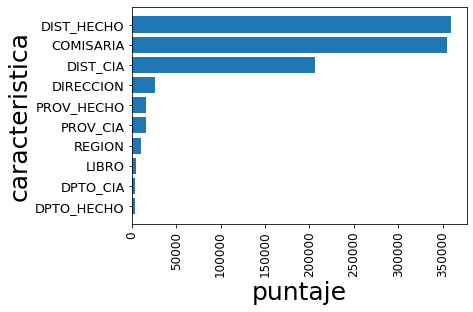

In [9]:
import matplotlib.pyplot as plt

feature_bar = feature_list.iloc[0:10].sort_values(by='puntaje', ascending=True).reset_index(drop=True)
peso = feature_bar['puntaje'].to_numpy()
caracteristica = feature_bar['caracteristica'].to_numpy()

plt.yticks(fontsize= 13)
plt.xticks(fontsize= 12, rotation=90)
plt.ylabel("caracteristica", fontsize=25)
plt.xlabel("puntaje", fontsize=25)
plt.barh(caracteristica, peso)
plt.show()